# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [169]:
import os, json, requests
import numpy as np 
import pandas as pd 
import urllib

os.environ["PUIDATA"] = "%s/PUIdata" % os.getenv("HOME")
path = os.getenv("PUIDATA")

# define the urls that we will be using 
firearm_url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs&exportFormat=csv"
gunmass_url = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"
pop_url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
gdp_url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urls, names = [firearm_url, gunmass_url], ['firearm.csv', 'gunmass.csv']
# requests each 
for url, name in zip(urls, names):
    try:
        filename = os.path.join(path, name)
        urllib.request.urlretrieve(url, filename)
    except ValueError:
        print("Cannot process %s" % name)

In [18]:
!curl http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv > population.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79717  100 79717    0     0   273k      0 --:--:-- --:--:-- --:--:--  273k


In [22]:
!mv population.zip $PUIDATA & unzip -o $PUIDATA/population.zip -d $PUIDATA

mv: cannot stat 'population.zip': No such file or directory
Archive:  /nfshome/ty1045/PUIdata/population.zip
  inflating: /nfshome/ty1045/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/ty1045/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/ty1045/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [25]:
!curl 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'> gdp.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  113k  100  113k    0     0   567k      0 --:--:-- --:--:-- --:--:--  569k


In [26]:
!mv gdp.zip $PUIDATA & unzip -o $PUIDATA/gdp.zip -d $PUIDATA

Archive:  /nfshome/ty1045/PUIdata/gdp.zip
  inflating: /nfshome/ty1045/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/ty1045/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/ty1045/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [63]:
# test to see our data is correct 
# gunmass
gunmass = pd.read_csv(os.path.join(path,"gunmass.csv"))
gunmass.head(3)

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2


In [64]:
# firearm
firearm = pd.read_csv(os.path.join(path,"firearm.csv"))
firearm.head(3)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0


In [65]:
# population
pop = pd.read_csv(os.path.join(path,"API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv"), header=2 )
pop.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN


In [66]:
# gdp
gdp = pd.read_csv(os.path.join(path,"API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv"), header=2 )
gdp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN


In [67]:
# retrive the designed rows 
pop, firearm, gdp = pop[['Country Name', '2017']], \
firearm[['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm' ]], \
gdp[['Country Name', '2017']]
firearm = firearm.rename(index=str, columns={'Country/Territory':'Country Name'})

In [68]:
# merge the subset of our data
pop_gdp = pop.merge(gdp, left_on='Country Name', right_on='Country Name')
pop_gdp.head()

,Country Name,2017_x,2017_y
0,Aruba,105264.0,NaN
1,Afghanistan,35530081.0,2.081530e+10
2,Angola,29784193.0,1.242094e+11
3,Albania,2873457.0,1.303935e+10
4,Andorra,76965.0,3.012914e+09


In [69]:
firearm_pop_gdp = firearm.merge(pop_gdp, left_on='Country Name', right_on='Country Name')
firearm_pop_gdp = firearm_pop_gdp.rename(index=str, columns={'2017_x' : 'pop',\
                                                            '2017_y' : 'gdp'})
firearm_pop_gdp.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp
0,Albania,270000.0,56.0,2873457.0,1.303935e+10
1,Algeria,1900000.0,20.0,41318142.0,1.703708e+11
2,Angola,2800000.0,NaN,29784193.0,1.242094e+11
3,Argentina,3950000.0,1198.0,44271041.0,6.375904e+11
4,Armenia,380000.0,9.0,2930450.0,1.153659e+10


In [70]:
df_ = firearm_pop_gdp.merge(gunmass, right_on="Country", left_on="Country Name")
df_ = df_.rename(index=str, columns={'Guns per 100 inhabitants' : 'Guns/100 inhabitants', 
                                     'Number of mass shootings (1983-2013)' : 'Number of mass shootings'})
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,24598933.0,1.323421e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8809212.0,4.165957e+11,Austria,30.4,1
2,Belgium,1800000.0,70.0,11372068.0,4.926813e+11,Belgium,17.2,2
3,Canada,9950000.0,173.0,36708083.0,1.653043e+12,Canada,30.8,4
4,Denmark,650000.0,15.0,5769603.0,3.248720e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [170]:
import pylab as pl
import matplotlib.pyplot as plt

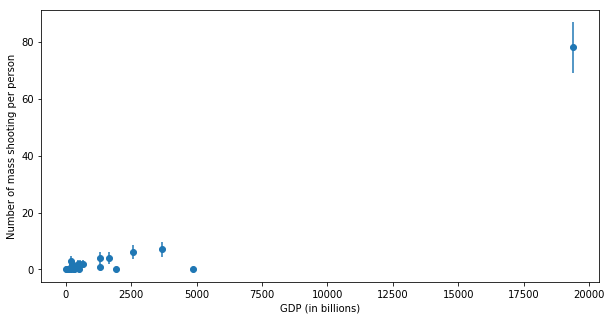

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [73]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

Text(0.5, 1.0, 'average number of civilian fire arms per person without errors')

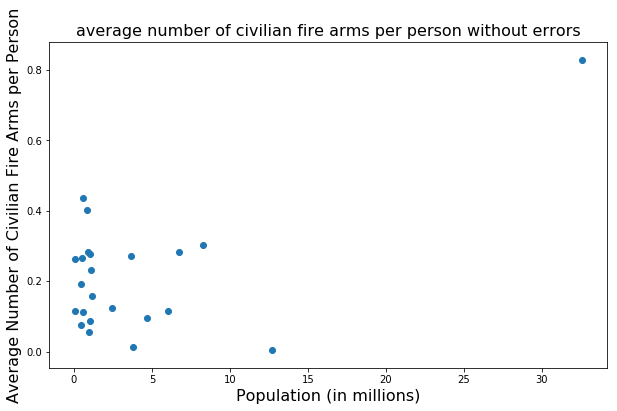

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(df_['pop'] / 1e7, df_['Average total all civilian firearms'] / df_['pop'])
plt.xlabel('Population (in millions)', fontsize=16)
plt.ylabel('Average Number of Civilian Fire Arms per Person', fontsize=16)
plt.title('average number of civilian fire arms per person without errors', fontsize=16)

There is one point on the top right corner that appears to be an outlier

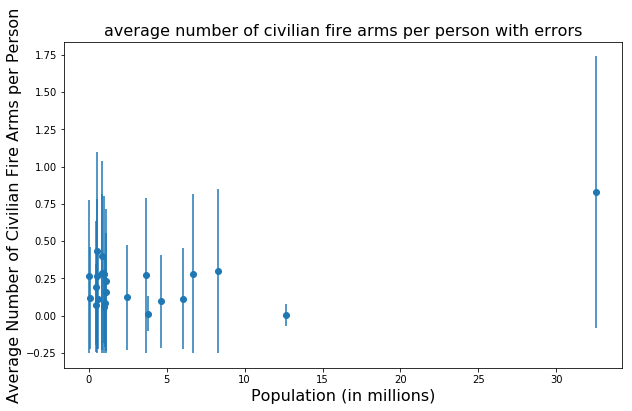

In [84]:
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['pop'] / 1e7,  df_['Average total all civilian firearms'] / df_['pop'])
ax.errorbar(df_['pop'] / 1e7, df_['Average total all civilian firearms'] / df_['pop'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / df_['pop'] * 1.0), fmt = '.')

ax.set_xlabel("Population (in millions)", fontsize=16)
ax.set_ylabel("Average Number of Civilian Fire Arms per Person", fontsize=16)
ax.set_xlim()
ax.set_title("average number of civilian fire arms per person with errors", fontsize=16)
pl.show()

We can see that there is one point with a big error.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5, 0, 'homicides by firearm per 1000 people')

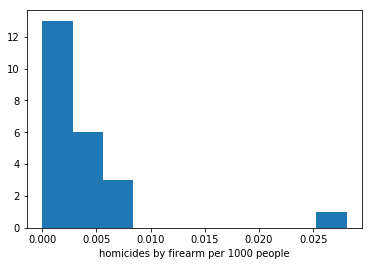

In [85]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')

Text(0.5, 1.0, 'number of homicide by fire arms per person without errors')

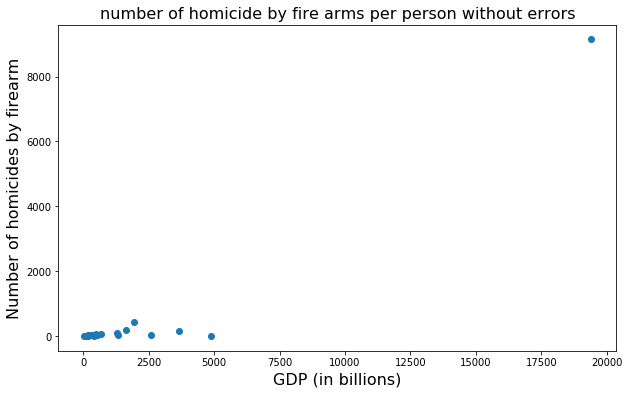

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(df_['gdp'] / 1e9, df_['Number of homicides by firearm'])
plt.xlabel('GDP (in billions)', fontsize=16)
plt.ylabel('Number of homicides by firearm', fontsize=16)
plt.title('number of homicide by fire arms per person without errors', fontsize=16)

There is one on the top right corner and it appears to be an outlier.

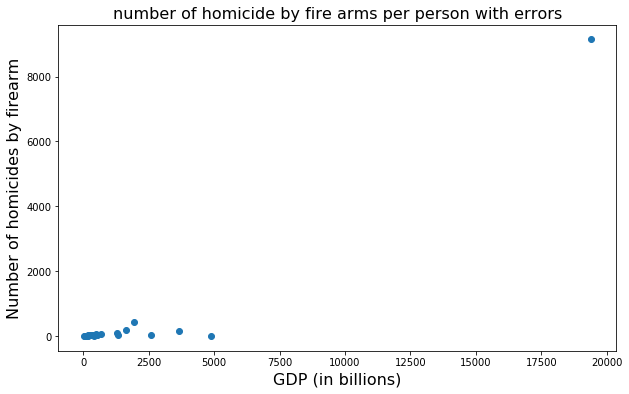

In [90]:
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['gdp'] / 1e9, df_['Number of homicides by firearm'])
ax.errorbar(df_['gdp'] / 1e9, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['gdp'] * 1.0), fmt = '.')

ax.set_xlabel("GDP (in billions)", fontsize=16)
ax.set_ylabel("Number of homicides by firearm", fontsize=16)
ax.set_xlim()
ax.set_title("number of homicide by fire arms per person with errors", fontsize=16)
pl.show()

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [91]:
USA = df_[df_['Country Name']== 'United States']

In [92]:
USA

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,shootingspp
22,United States,270000000.0,9146.0,325719178.0,1.939060e+13,United States,88.8,78,0.000239


Text(0.5, 1.0, 'number of homicide by fire arms without errors')

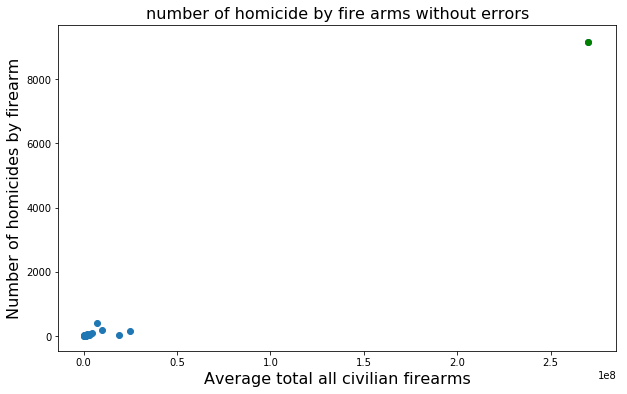

In [94]:
plt.figure(figsize=(10,6))
plt.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
plt.scatter(USA['Average total all civilian firearms'], USA['Number of homicides by firearm'], color = 'g')
plt.xlabel('Average total all civilian firearms', fontsize=16)
plt.ylabel('Number of homicides by firearm', fontsize=16)
plt.title('number of homicide by fire arms without errors', fontsize=16)

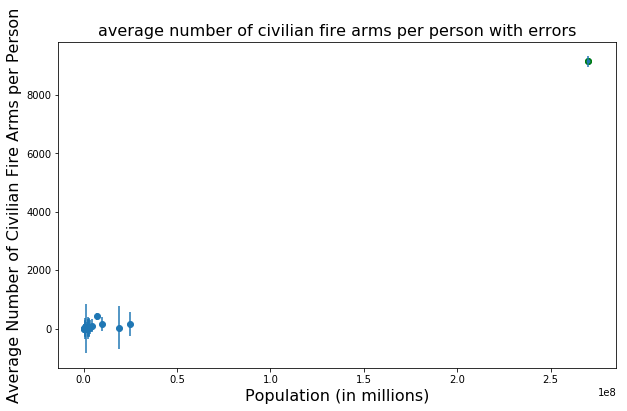

In [95]:
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
scatter_usa = ax.scatter(USA['Average total all civilian firearms'], USA['Number of homicides by firearm'], color = 'g')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / df_['Number of homicides by firearm'] * 1.0), fmt = '.')

ax.set_xlabel("Population (in millions)", fontsize=16)
ax.set_ylabel("Average Number of Civilian Fire Arms per Person", fontsize=16)
ax.set_xlim()
ax.set_title("average number of civilian fire arms per person with errors", fontsize=16)
pl.show()

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0.5, 1.0, 'number of homicide by fire arms without errors')

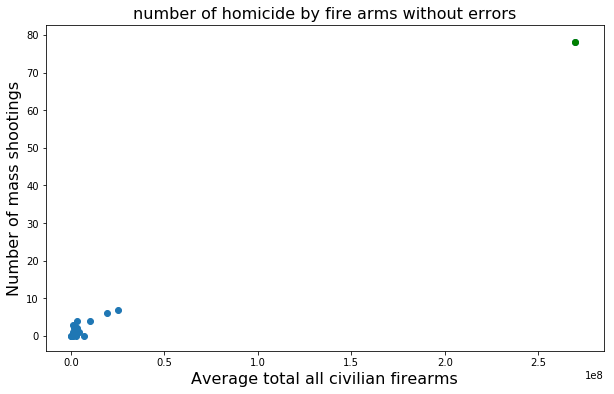

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
plt.scatter(USA['Average total all civilian firearms'], USA['Number of mass shootings'], color = 'g')
plt.xlabel('Average total all civilian firearms', fontsize=16)
plt.ylabel('Number of mass shootings', fontsize=16)
plt.title('number of homicide by fire arms without errors', fontsize=16)

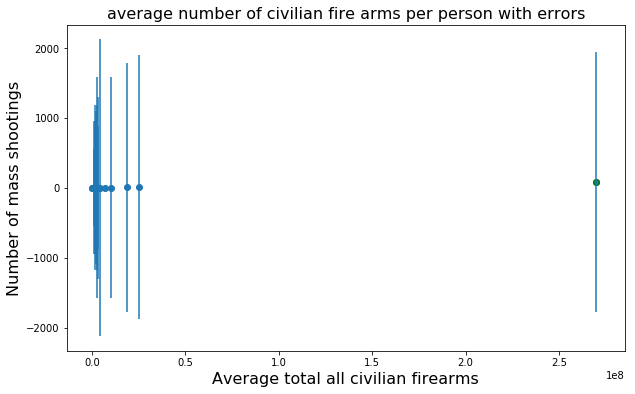

In [98]:
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
scatter_usa = ax.scatter(USA['Average total all civilian firearms'], USA['Number of mass shootings'], color = 'g')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / df_['Number of mass shootings'] * 1.0), fmt = '.')

ax.set_xlabel("Average total all civilian firearms", fontsize=16)
ax.set_ylabel("Number of mass shootings", fontsize=16)
ax.set_xlim()
ax.set_title("average number of civilian fire arms per person with errors", fontsize=16)
pl.show()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [171]:
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns 

In [119]:
df_['shootingspp'], df_['firearmspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7, \
df_['Average total all civilian firearms'] / df_['pop']
df_.head(3)

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,shootingspp,avgf,firmarmspp,firearmspp
0,Australia,3050000.0,30.0,24598933.0,1.323421e+12,Australia,15.0,4,1.626087,0.123989,0.123989,0.123989
1,Austria,2500000.0,18.0,8809212.0,4.165957e+11,Austria,30.4,1,1.135175,0.283794,0.283794,0.283794
2,Belgium,1800000.0,70.0,11372068.0,4.926813e+11,Belgium,17.2,2,1.758695,0.158283,0.158283,0.158283


Text(0.5, 1.0, 'number of mass shootings vs Average total all civilian firearms without errors')

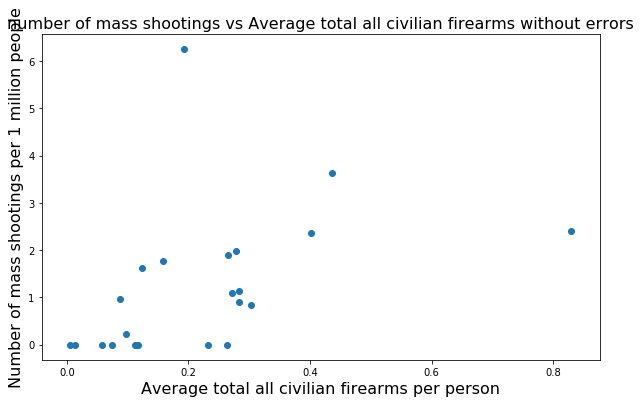

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(df_['firmarmspp'], df_['shootingspp'])
#plt.scatter(USA['Average total all civilian firearms'], USA['Number of mass shootings'], color = 'g')
plt.xlabel('Average total all civilian firearms per person', fontsize=16)
plt.ylabel('Number of mass shootings per 1 million people', fontsize=16)
plt.title('number of mass shootings vs Average total all civilian firearms without errors', fontsize=16)

In [131]:
# fit a OLS
x, y = sm.add_constant(df_['firearmspp']), df_['shootingspp']
mod = smf.ols(formula = 'y~x', data = df_).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     5.124
Date:                Tue, 13 Nov 2018   Prob (F-statistic):             0.0343
Time:                        20:35:13   Log-Likelihood:                -39.068
No. Observations:                  23   AIC:                             82.14
Df Residuals:                      21   BIC:                             84.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1784      0.232      0.770      0.450      -0.303       0.660
x[0]           0.1784      0.232      0.770      0.450      -0.303       0.660
x[1]           3.7701      1.665      2.264      0.034       0.307       7.234
==============================================================================
Omnibus:                       32.830   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.798
Skew:                           2.556   Prob(JB):                     1.28e-17
Kurtosis:                      10.419   Cond. No.                     3.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [137]:
print(len(x), len(y))

23 23


In [159]:
mod.fittedvalues

0     0.824241
1     1.426723
2     0.953531
3     1.378705
4     0.781526
5     1.998555
6     1.424035
7     1.496553
8     1.232709
9     0.572638
10    1.351005
11    0.638747
12    0.792629
13    0.377900
14    0.797039
15    1.084245
16    1.356019
17    0.407418
18    0.686416
19    0.721073
20    1.405317
21    1.870887
22    3.481968
dtype: float64

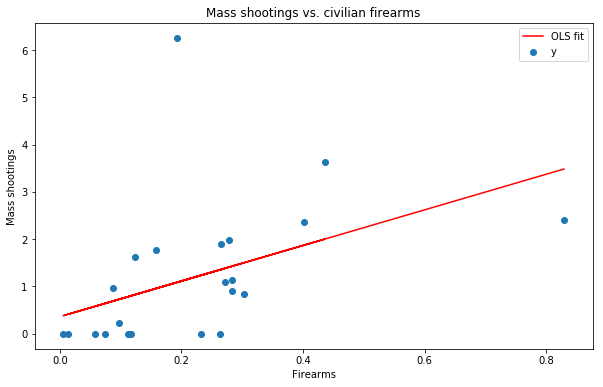

In [182]:
# draw the model fitted line 
pred = mod.predict(x)
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'], df_['shootingspp'], label='y')
pl.plot(df_['firearmspp'], pred, color='r', label='OLS fit')
ax.set_xlabel("Firearms")
ax.set_ylabel("Mass shootings")
ax.set_title("Mass shootings vs. civilian firearms")
ax.set_ylim()
ax.legend()

In [167]:
# now fit a WLS model to our data
len_y = len(y)
yerr, ws = np.sqrt(y), np.zeros(len_y)
# generate ws 
ws = [1 if yerr[i] == 0 else 1 / yerr[i] for i in range(0, len_y)]
ws = np.array(ws)

In [168]:
modwls = sm.WLS(y, x, weights=ws ** 2).fit()
modwls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.339
Model:                            WLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     10.77
Date:                Tue, 13 Nov 2018   Prob (F-statistic):            0.00356
Time:                        20:53:48   Log-Likelihood:                -28.022
No. Observations:                  23   AIC:                             60.04
Df Residuals:                      21   BIC:                             62.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0307      0.257     -0.119      0.906      -0.566       0.504
firearmspp     3.8458      1.172      3.281      0.004       1.408       6.283
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.476
Skew:                           0.959   Prob(JB):                        0.107
Kurtosis:                       3.995   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

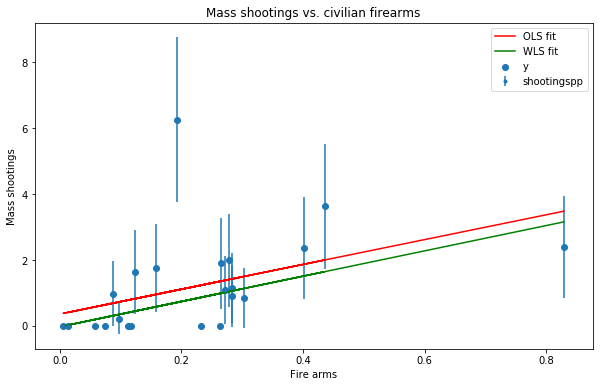

In [184]:
# draw the model fitted line with error bar 
pred = mod.predict(x)
pred_wls = modwls.predict(x)
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'], df_['shootingspp'], label='y')
pl.plot(df_['firearmspp'], pred, color='r', label='OLS fit')
pl.plot(df_['firearmspp'], pred_wls, color='g', label='WLS fit')

ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp']), fmt = '.')

ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_title("Mass shootings vs. civilian firearms")
ax.set_ylim()
ax.legend()

/nfshome/ty1045/.conda/envs/geo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


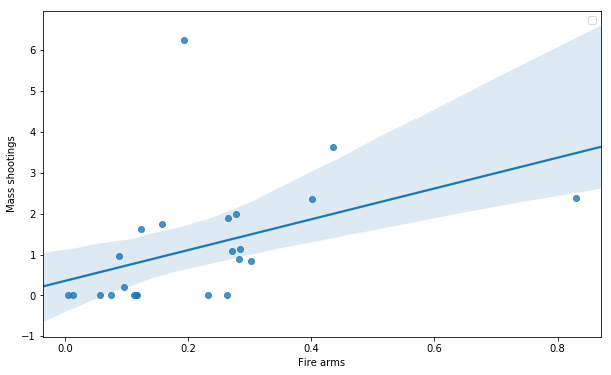

In [185]:
# regplot 
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)

sns.regplot(x='firearmspp', y='shootingspp', data=df_)
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.legend()

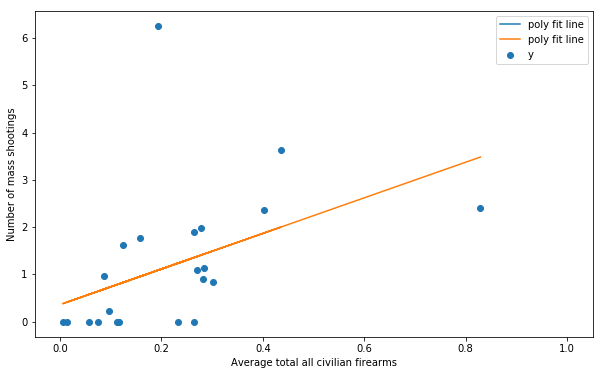

In [190]:
# now use np.polyfit() method to fit the model 
fig = pl.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'], df_['shootingspp'], label='y')
alpha = 1.0
n1, n0 = np.polyfit(df_['firearmspp'], df_['shootingspp'], alpha) 
y = x * n1 + n0
pl.plot(x, y, label="poly fit line")

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
#ax.set_ylim()
ax.legend()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



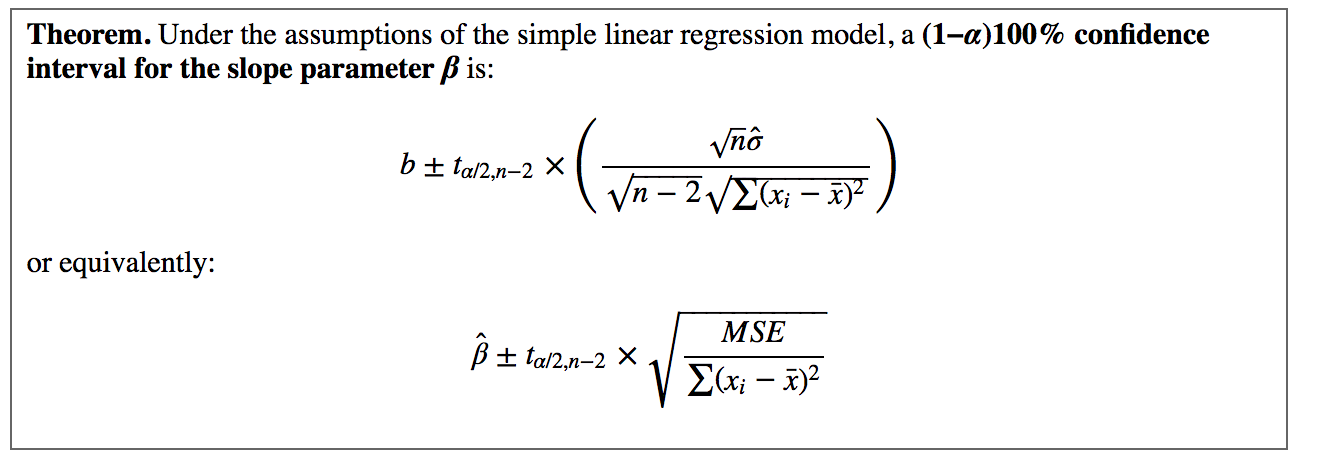

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

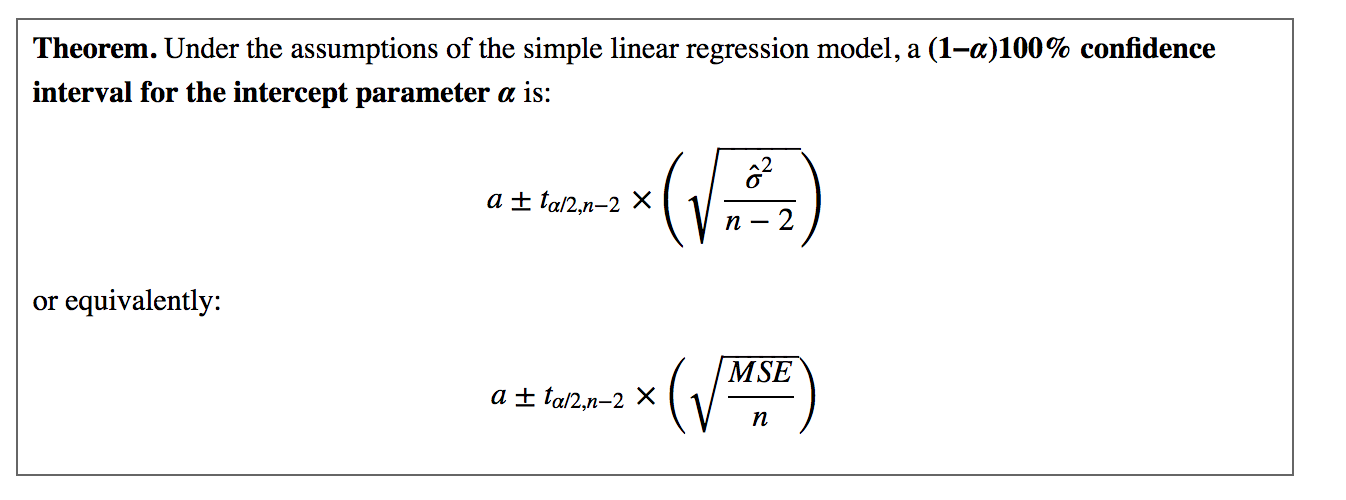

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

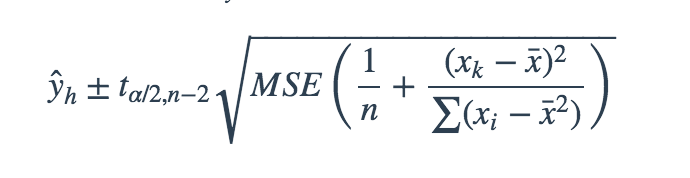

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

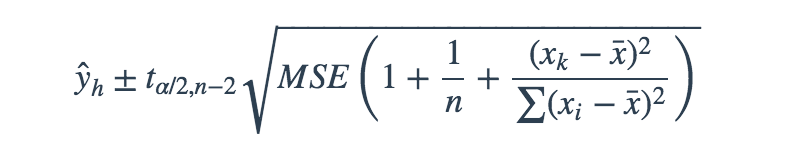

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

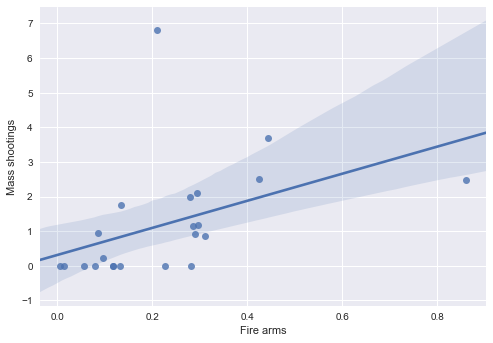

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

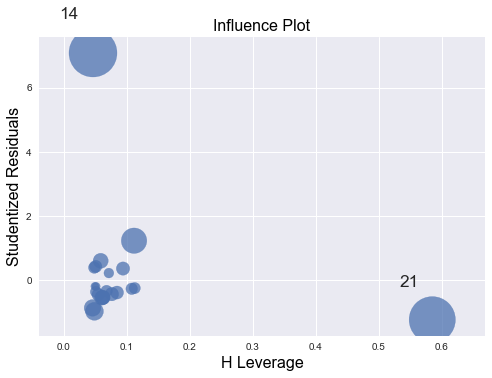

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings